In [24]:
from models.cvae import CVAE
from modules.loss import LPIPS_MAE_klloss
import torch

In [13]:
loss=LPIPS_MAE_klloss()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/root/.conda/envs/ldm-mri/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/.conda/envs/ldm-mri/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /root/.conda/envs/ldm-mri/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth


In [36]:
model=CVAE.load_from_checkpoint(checkpoint_path="/root/VAE/cVAE/logs/2024-01-01T23-21-09[8, 16]klweight0.00075/checkpoints/last.ckpt",
                                learning_rate=0.1,ch=8,ch_mult=[8,16],resolutoion=256,in_ch=3,numhead=None,loss=loss).to('cpu')

In [37]:
torch.save(model,"vae.pt")

In [29]:
random = torch.randn(1, 128, 8, 8).to('cpu')


In [31]:
output=model.decode(random)
print(output.shape)

torch.Size([1, 3, 32, 32])


In [34]:
import matplotlib.pyplot as plt
import numpy as np

def show(out_tensor):


    image_np = out_tensor.clamp(0, 1).detach().numpy()

    # The shape of the numpy array will be [1, 3, 32, 32], we need to change it to [32, 32, 3]
    image_np = np.transpose(image_np[0], (1, 2, 0))

    # Step 3: Use matplotlib to display the image
    plt.imshow(image_np)
    plt.axis('off')  # Turn off the axis
    plt.show()

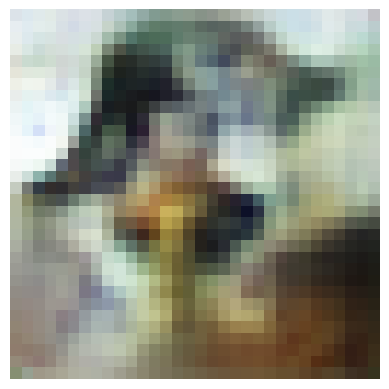

In [35]:
show(output)